In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
##########################################################################
expenses_data = pd.read_csv('Data/expenses dataset.csv')
expenses_data['expenseDate'] = pd.to_datetime(expenses_data['expenseDate'], infer_datetime_format=True)
selected_columns =['expenseAmount', 'expenseDate']
expenses_data = expenses_data[selected_columns]
##########################################################################
print('Shape of expenses data', expenses_data.shape)
expenses_data

FileNotFoundError: [Errno 2] No such file or directory: 'Data/expenses dataset.csv'

In [ ]:
# The function groups either the expense or sales data into the daily series
# But the first column must be the amount and the second column must be the dates in datetime format
def groupDay(df):
    df['Year'] = df.iloc[:,1].dt.year
    df['Month'] = df.iloc[:,1].dt.month
    df['Day'] = df.iloc[:,1].dt.day
    df['Amount'] = df.iloc[:,0]
    daily = df.groupby(['Year','Month','Day'])['Amount'].sum().reset_index()
    return daily

def dailyToSingleDate(df,Year, Month, Day):
        df['date'] = pd.to_datetime(df[['Year','Month','Day']])
        df = df.drop(['Year','Month','Day'], axis=1)
        df = df.set_index('date')
        return df

In [ ]:
ed = groupDay(expenses_data)
daily_expenses = dailyToSingleDate(ed, ed['Year'], ed['Month'], ed['Day'])
dailyExpenses = daily_expenses[890:]  #890 for the removal of irrelevant data points

In [ ]:
dailyExpenses = pd.DataFrame(dailyExpenses)
dailyExpenses.reset_index(inplace=True)
dailyExpenses =dailyExpenses['Amount']
print(len(dailyExpenses))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(dailyExpenses)
plt.title('Daily Expenses')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Scaling the data


In [ ]:
expenses = np.array(dailyExpenses).reshape(-1,1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(expenses)
scaled_data

In [ ]:
def df_to_X_y(df, window_size=4):
    df_as_np = df
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [111]:
WINDOW_SIZE = 3
X, y = df_to_X_y(expenses, WINDOW_SIZE)
X.shape, y.shape

((179, 3, 1, 1), (179, 1))

In [112]:
X

array([[[[ 81700.]],

        [[125150.]],

        [[ 42825.]]],


       [[[125150.]],

        [[ 42825.]],

        [[ 44300.]]],


       [[[ 42825.]],

        [[ 44300.]],

        [[ 13500.]]],


       [[[ 44300.]],

        [[ 13500.]],

        [[ 39000.]]],


       [[[ 13500.]],

        [[ 39000.]],

        [[ 60500.]]],


       [[[ 39000.]],

        [[ 60500.]],

        [[ 16400.]]],


       [[[ 60500.]],

        [[ 16400.]],

        [[ 50200.]]],


       [[[ 16400.]],

        [[ 50200.]],

        [[  3200.]]],


       [[[ 50200.]],

        [[  3200.]],

        [[ 60600.]]],


       [[[  3200.]],

        [[ 60600.]],

        [[224200.]]],


       [[[ 60600.]],

        [[224200.]],

        [[133000.]]],


       [[[224200.]],

        [[133000.]],

        [[162200.]]],


       [[[133000.]],

        [[162200.]],

        [[ 10500.]]],


       [[[162200.]],

        [[ 10500.]],

        [[187300.]]],


       [[[ 10500.]],

        [[187300.]],

    

In [113]:
y

array([[ 44300.],
       [ 13500.],
       [ 39000.],
       [ 60500.],
       [ 16400.],
       [ 50200.],
       [  3200.],
       [ 60600.],
       [224200.],
       [133000.],
       [162200.],
       [ 10500.],
       [187300.],
       [ 82000.],
       [133700.],
       [147500.],
       [ 87600.],
       [ 21000.],
       [125650.],
       [ 60200.],
       [ 64500.],
       [285100.],
       [211100.],
       [ 51850.],
       [ 52100.],
       [ 39200.],
       [136600.],
       [ 65000.],
       [  3800.],
       [ 89400.],
       [128600.],
       [ 61200.],
       [ 42500.],
       [ 14450.],
       [ 93500.],
       [ 81700.],
       [135500.],
       [ 13500.],
       [ 32600.],
       [ 17500.],
       [ 91000.],
       [ 68700.],
       [ 69600.],
       [ 84500.],
       [154500.],
       [ 38500.],
       [ 18300.],
       [ 61900.],
       [ 59600.],
       [100200.],
       [ 42000.],
       [ 54400.],
       [ 21000.],
       [ 53500.],
       [ 82200.],
       [15

In [114]:
# X_train, y_train = X[:37], y[:37]
# X_val, y_val = X[37:39], y[37:39]
# X_test, y_test = X[39:], y[39:]
# X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [115]:
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, shuffle=True)

In [116]:
X_train

array([[[[348300.]],

        [[460900.]],

        [[ 32950.]]],


       [[[  8500.]],

        [[  7000.]],

        [[ 43000.]]],


       [[[ 51850.]],

        [[ 52100.]],

        [[ 39200.]]],


       [[[ 50800.]],

        [[ 22500.]],

        [[182150.]]],


       [[[ 46700.]],

        [[167500.]],

        [[103600.]]],


       [[[ 13200.]],

        [[ 68000.]],

        [[ 44000.]]],


       [[[108500.]],

        [[ 13700.]],

        [[191700.]]],


       [[[ 14450.]],

        [[ 93500.]],

        [[ 81700.]]],


       [[[ 21100.]],

        [[141400.]],

        [[ 46000.]]],


       [[[167500.]],

        [[103600.]],

        [[ 24000.]]],


       [[[ 60200.]],

        [[ 64500.]],

        [[285100.]]],


       [[[191700.]],

        [[ 84800.]],

        [[ 17000.]]],


       [[[ 59500.]],

        [[ 32900.]],

        [[ 81500.]]],


       [[[ 10000.]],

        [[ 13200.]],

        [[ 68000.]]],


       [[[224200.]],

        [[133000.]],

    

In [117]:
y_train

array([[ 48700.],
       [ 40000.],
       [136600.],
       [ 59100.],
       [ 24000.],
       [162000.],
       [ 84800.],
       [135500.],
       [ 59500.],
       [126500.],
       [211100.],
       [ 25800.],
       [ 91400.],
       [ 44000.],
       [ 10500.],
       [  3200.],
       [ 65000.],
       [237900.],
       [ 16400.],
       [ 42500.],
       [101700.],
       [ 81700.],
       [ 17000.],
       [162200.],
       [158000.],
       [307700.],
       [ 44300.],
       [ 16600.],
       [ 57100.],
       [ 28600.],
       [154500.],
       [ 59350.],
       [  3800.],
       [ 91000.],
       [ 81200.],
       [ 37900.],
       [ 39200.],
       [ 51850.],
       [159150.],
       [ 39700.],
       [ 82100.],
       [ 54500.],
       [ 17500.],
       [202000.],
       [ 48200.],
       [122700.],
       [ 95800.],
       [ 25900.],
       [ 61900.],
       [167500.],
       [ 17000.],
       [108500.],
       [ 14800.],
       [ 26500.],
       [ 14450.],
       [ 8

In [118]:
len(X_train), X_train.shape

(125, (125, 3, 1, 1))

In [119]:
len(X_test), X_test.shape

(43, (43, 3, 1, 1))

In [120]:
len(y_train)

125

In [121]:
len(y_test)

43

In [122]:
len(y_val)

11

In [123]:
len(X_val)

11

In [124]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [125]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [126]:
model = Sequential([
    LSTM(128, return_sequences=True, activation='tanh'),
    Dropout(0.2),
    LSTM(128, activation='tanh'),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(1)
])

In [127]:
cp = ModelCheckpoint('Models/dailyExpenses/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics = [RootMeanSquaredError()])

In [128]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp])

Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 11347197952.0000 - root_mean_squared_error: 106523.2266INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 33s 7s/step - loss: 11347197952.0000 - root_mean_squared_error: 106523.2266 - val_loss: 3947303936.0000 - val_root_mean_squared_error: 62827.5742
Epoch 2/100
3/4 [=====================>........] - ETA: 0s - loss: 12053902336.0000 - root_mean_squared_error: 109790.2656INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 16s 5s/step - loss: 11347182592.0000 - root_mean_squared_error: 106523.1562 - val_loss: 3947290624.0000 - val_root_mean_squared_error: 62827.4688
Epoch 3/100
3/4 [=====================>........] - ETA: 0s - loss: 10749021184.0000 - root_mean_squared_error: 103677.4844INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 17s 6s/step - loss: 11347169280.0000 - root_mean_squared_error: 106523.0938 - val_loss: 3947278592.0000 - val_root_mean_squared_error: 62827.3711
Epoch 4/100
4/4 [==============================] - ETA: 0s - loss: 11347152896.0000 - root_mean_squared_error: 106523.0156INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 16s 5s/step - loss: 11347152896.0000 - root_mean_squared_error: 106523.0156 - val_loss: 3947266816.0000 - val_root_mean_squared_error: 62827.2773
Epoch 5/100
3/4 [=====================>........] - ETA: 0s - loss: 12440507392.0000 - root_mean_squared_error: 111537.0234INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 16s 5s/step - loss: 11347138560.0000 - root_mean_squared_error: 106522.9453 - val_loss: 3947255296.0000 - val_root_mean_squared_error: 62827.1875
Epoch 6/100
3/4 [=====================>........] - ETA: 0s - loss: 10146364416.0000 - root_mean_squared_error: 100729.1641INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 18s 6s/step - loss: 11347121152.0000 - root_mean_squared_error: 106522.8672 - val_loss: 3947244032.0000 - val_root_mean_squared_error: 62827.0977
Epoch 7/100
4/4 [==============================] - ETA: 0s - loss: 11347102720.0000 - root_mean_squared_error: 106522.7812INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 17s 6s/step - loss: 11347102720.0000 - root_mean_squared_error: 106522.7812 - val_loss: 3947232512.0000 - val_root_mean_squared_error: 62827.0039
Epoch 8/100
4/4 [==============================] - ETA: 0s - loss: 11347084288.0000 - root_mean_squared_error: 106522.6953INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 18s 6s/step - loss: 11347084288.0000 - root_mean_squared_error: 106522.6953 - val_loss: 3947220992.0000 - val_root_mean_squared_error: 62826.9141
Epoch 9/100
4/4 [==============================] - ETA: 0s - loss: 11347069952.0000 - root_mean_squared_error: 106522.6250INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11347069952.0000 - root_mean_squared_error: 106522.6250 - val_loss: 3947207936.0000 - val_root_mean_squared_error: 62826.8086
Epoch 10/100
4/4 [==============================] - ETA: 0s - loss: 11347044352.0000 - root_mean_squared_error: 106522.5078INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 17s 6s/step - loss: 11347044352.0000 - root_mean_squared_error: 106522.5078 - val_loss: 3947195392.0000 - val_root_mean_squared_error: 62826.7109
Epoch 11/100
4/4 [==============================] - ETA: 0s - loss: 11347028992.0000 - root_mean_squared_error: 106522.4375INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 19s 6s/step - loss: 11347028992.0000 - root_mean_squared_error: 106522.4375 - val_loss: 3947181568.0000 - val_root_mean_squared_error: 62826.5977
Epoch 12/100
4/4 [==============================] - ETA: 0s - loss: 11347003392.0000 - root_mean_squared_error: 106522.3125INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 20s 6s/step - loss: 11347003392.0000 - root_mean_squared_error: 106522.3125 - val_loss: 3947166720.0000 - val_root_mean_squared_error: 62826.4805
Epoch 13/100
4/4 [==============================] - ETA: 0s - loss: 11346979840.0000 - root_mean_squared_error: 106522.2031INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 16s 5s/step - loss: 11346979840.0000 - root_mean_squared_error: 106522.2031 - val_loss: 3947148032.0000 - val_root_mean_squared_error: 62826.3320
Epoch 14/100
3/4 [=====================>........] - ETA: 0s - loss: 9631706112.0000 - root_mean_squared_error: 98141.2578  INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11346953216.0000 - root_mean_squared_error: 106522.0781 - val_loss: 3947130624.0000 - val_root_mean_squared_error: 62826.1953
Epoch 15/100
3/4 [=====================>........] - ETA: 0s - loss: 10704486400.0000 - root_mean_squared_error: 103462.4844INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11346926592.0000 - root_mean_squared_error: 106521.9531 - val_loss: 3947110656.0000 - val_root_mean_squared_error: 62826.0352
Epoch 16/100
4/4 [==============================] - ETA: 0s - loss: 11346897920.0000 - root_mean_squared_error: 106521.8203INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11346897920.0000 - root_mean_squared_error: 106521.8203 - val_loss: 3947090176.0000 - val_root_mean_squared_error: 62825.8711
Epoch 17/100
4/4 [==============================] - ETA: 0s - loss: 11346859008.0000 - root_mean_squared_error: 106521.6328INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11346859008.0000 - root_mean_squared_error: 106521.6328 - val_loss: 3947067904.0000 - val_root_mean_squared_error: 62825.6953
Epoch 18/100
3/4 [=====================>........] - ETA: 0s - loss: 10607883264.0000 - root_mean_squared_error: 102994.5781INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 18s 6s/step - loss: 11346821120.0000 - root_mean_squared_error: 106521.4609 - val_loss: 3947041792.0000 - val_root_mean_squared_error: 62825.4883
Epoch 19/100
4/4 [==============================] - ETA: 0s - loss: 11346785280.0000 - root_mean_squared_error: 106521.2891INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11346785280.0000 - root_mean_squared_error: 106521.2891 - val_loss: 3947012096.0000 - val_root_mean_squared_error: 62825.2500
Epoch 20/100
3/4 [=====================>........] - ETA: 0s - loss: 10864831488.0000 - root_mean_squared_error: 104234.5000INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11346748416.0000 - root_mean_squared_error: 106521.1172 - val_loss: 3946979072.0000 - val_root_mean_squared_error: 62824.9883
Epoch 21/100
3/4 [=====================>........] - ETA: 0s - loss: 9587966976.0000 - root_mean_squared_error: 97918.1641  INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11346695168.0000 - root_mean_squared_error: 106520.8672 - val_loss: 3946942464.0000 - val_root_mean_squared_error: 62824.6953
Epoch 22/100
4/4 [==============================] - ETA: 0s - loss: 11346640896.0000 - root_mean_squared_error: 106520.6094INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11346640896.0000 - root_mean_squared_error: 106520.6094 - val_loss: 3946901760.0000 - val_root_mean_squared_error: 62824.3711
Epoch 23/100
4/4 [==============================] - ETA: 0s - loss: 11346576384.0000 - root_mean_squared_error: 106520.3125INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11346576384.0000 - root_mean_squared_error: 106520.3125 - val_loss: 3946854144.0000 - val_root_mean_squared_error: 62823.9922
Epoch 24/100
3/4 [=====================>........] - ETA: 0s - loss: 11998126080.0000 - root_mean_squared_error: 109535.9609INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11346505728.0000 - root_mean_squared_error: 106519.9766 - val_loss: 3946803200.0000 - val_root_mean_squared_error: 62823.5898
Epoch 25/100
3/4 [=====================>........] - ETA: 0s - loss: 11209404416.0000 - root_mean_squared_error: 105874.4766INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 13s 4s/step - loss: 11346424832.0000 - root_mean_squared_error: 106519.6016 - val_loss: 3946747648.0000 - val_root_mean_squared_error: 62823.1445
Epoch 26/100
3/4 [=====================>........] - ETA: 0s - loss: 10044729344.0000 - root_mean_squared_error: 100223.3984INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11346349056.0000 - root_mean_squared_error: 106519.2422 - val_loss: 3946688768.0000 - val_root_mean_squared_error: 62822.6758
Epoch 27/100
3/4 [=====================>........] - ETA: 0s - loss: 10078323712.0000 - root_mean_squared_error: 100390.8516INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11346254848.0000 - root_mean_squared_error: 106518.7969 - val_loss: 3946617088.0000 - val_root_mean_squared_error: 62822.1055
Epoch 28/100
4/4 [==============================] - ETA: 0s - loss: 11346146304.0000 - root_mean_squared_error: 106518.2891INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11346146304.0000 - root_mean_squared_error: 106518.2891 - val_loss: 3946544128.0000 - val_root_mean_squared_error: 62821.5273
Epoch 29/100
3/4 [=====================>........] - ETA: 0s - loss: 10370458624.0000 - root_mean_squared_error: 101835.4453INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11346028544.0000 - root_mean_squared_error: 106517.7344 - val_loss: 3946465536.0000 - val_root_mean_squared_error: 62820.9023
Epoch 30/100
4/4 [==============================] - ETA: 0s - loss: 11345888256.0000 - root_mean_squared_error: 106517.0781INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11345888256.0000 - root_mean_squared_error: 106517.0781 - val_loss: 3946379008.0000 - val_root_mean_squared_error: 62820.2109
Epoch 31/100
4/4 [==============================] - ETA: 0s - loss: 11345758208.0000 - root_mean_squared_error: 106516.4688INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11345758208.0000 - root_mean_squared_error: 106516.4688 - val_loss: 3946284544.0000 - val_root_mean_squared_error: 62819.4609
Epoch 32/100
3/4 [=====================>........] - ETA: 0s - loss: 10539868160.0000 - root_mean_squared_error: 102663.8594INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11345650688.0000 - root_mean_squared_error: 106515.9609 - val_loss: 3946183936.0000 - val_root_mean_squared_error: 62818.6602
Epoch 33/100
3/4 [=====================>........] - ETA: 0s - loss: 10723339264.0000 - root_mean_squared_error: 103553.5547INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11345491968.0000 - root_mean_squared_error: 106515.2188 - val_loss: 3946067712.0000 - val_root_mean_squared_error: 62817.7344
Epoch 34/100
4/4 [==============================] - ETA: 0s - loss: 11345319936.0000 - root_mean_squared_error: 106514.4141INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 4s/step - loss: 11345319936.0000 - root_mean_squared_error: 106514.4141 - val_loss: 3945952256.0000 - val_root_mean_squared_error: 62816.8164
Epoch 35/100
4/4 [==============================] - ETA: 0s - loss: 11345123328.0000 - root_mean_squared_error: 106513.4922INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11345123328.0000 - root_mean_squared_error: 106513.4922 - val_loss: 3945829120.0000 - val_root_mean_squared_error: 62815.8359
Epoch 36/100
4/4 [==============================] - ETA: 0s - loss: 11344924672.0000 - root_mean_squared_error: 106512.5547INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11344924672.0000 - root_mean_squared_error: 106512.5547 - val_loss: 3945698048.0000 - val_root_mean_squared_error: 62814.7930
Epoch 37/100
3/4 [=====================>........] - ETA: 0s - loss: 13046808576.0000 - root_mean_squared_error: 114222.6250INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11344722944.0000 - root_mean_squared_error: 106511.6094 - val_loss: 3945560576.0000 - val_root_mean_squared_error: 62813.6992
Epoch 38/100
4/4 [==============================] - ETA: 0s - loss: 11344500736.0000 - root_mean_squared_error: 106510.5625INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11344500736.0000 - root_mean_squared_error: 106510.5625 - val_loss: 3945418752.0000 - val_root_mean_squared_error: 62812.5703
Epoch 39/100
4/4 [==============================] - ETA: 0s - loss: 11344297984.0000 - root_mean_squared_error: 106509.6172INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11344297984.0000 - root_mean_squared_error: 106509.6172 - val_loss: 3945269504.0000 - val_root_mean_squared_error: 62811.3789
Epoch 40/100
4/4 [==============================] - ETA: 0s - loss: 11344055296.0000 - root_mean_squared_error: 106508.4766INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11344055296.0000 - root_mean_squared_error: 106508.4766 - val_loss: 3945110784.0000 - val_root_mean_squared_error: 62810.1172
Epoch 41/100
3/4 [=====================>........] - ETA: 0s - loss: 11916411904.0000 - root_mean_squared_error: 109162.3203INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11343840256.0000 - root_mean_squared_error: 106507.4688 - val_loss: 3944946176.0000 - val_root_mean_squared_error: 62808.8047
Epoch 42/100
4/4 [==============================] - ETA: 0s - loss: 11343570944.0000 - root_mean_squared_error: 106506.2031INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 4s/step - loss: 11343570944.0000 - root_mean_squared_error: 106506.2031 - val_loss: 3944778240.0000 - val_root_mean_squared_error: 62807.4688
Epoch 43/100
3/4 [=====================>........] - ETA: 0s - loss: 11314936832.0000 - root_mean_squared_error: 106371.6953INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11343373312.0000 - root_mean_squared_error: 106505.2734 - val_loss: 3944605184.0000 - val_root_mean_squared_error: 62806.0938
Epoch 44/100
4/4 [==============================] - ETA: 0s - loss: 11343090688.0000 - root_mean_squared_error: 106503.9453INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11343090688.0000 - root_mean_squared_error: 106503.9453 - val_loss: 3944428544.0000 - val_root_mean_squared_error: 62804.6875
Epoch 45/100
3/4 [=====================>........] - ETA: 0s - loss: 9874052096.0000 - root_mean_squared_error: 99368.2656INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11342813184.0000 - root_mean_squared_error: 106502.6406 - val_loss: 3944246272.0000 - val_root_mean_squared_error: 62803.2344
Epoch 46/100
4/4 [==============================] - ETA: 0s - loss: 11342554112.0000 - root_mean_squared_error: 106501.4297INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11342554112.0000 - root_mean_squared_error: 106501.4297 - val_loss: 3944058624.0000 - val_root_mean_squared_error: 62801.7422
Epoch 47/100
4/4 [==============================] - ETA: 0s - loss: 11342282752.0000 - root_mean_squared_error: 106500.1562INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11342282752.0000 - root_mean_squared_error: 106500.1562 - val_loss: 3943867904.0000 - val_root_mean_squared_error: 62800.2227
Epoch 48/100
4/4 [==============================] - ETA: 0s - loss: 11342003200.0000 - root_mean_squared_error: 106498.8438INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11342003200.0000 - root_mean_squared_error: 106498.8438 - val_loss: 3943674112.0000 - val_root_mean_squared_error: 62798.6797
Epoch 49/100
4/4 [==============================] - ETA: 0s - loss: 11341680640.0000 - root_mean_squared_error: 106497.3281INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11341680640.0000 - root_mean_squared_error: 106497.3281 - val_loss: 3943479040.0000 - val_root_mean_squared_error: 62797.1250
Epoch 50/100
4/4 [==============================] - ETA: 0s - loss: 11341424640.0000 - root_mean_squared_error: 106496.1250INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11341424640.0000 - root_mean_squared_error: 106496.1250 - val_loss: 3943280640.0000 - val_root_mean_squared_error: 62795.5469
Epoch 51/100
4/4 [==============================] - ETA: 0s - loss: 11341048832.0000 - root_mean_squared_error: 106494.3594INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11341048832.0000 - root_mean_squared_error: 106494.3594 - val_loss: 3943083776.0000 - val_root_mean_squared_error: 62793.9805
Epoch 52/100
4/4 [==============================] - ETA: 0s - loss: 11340855296.0000 - root_mean_squared_error: 106493.4531INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11340855296.0000 - root_mean_squared_error: 106493.4531 - val_loss: 3942880256.0000 - val_root_mean_squared_error: 62792.3594
Epoch 53/100
4/4 [==============================] - ETA: 0s - loss: 11340487680.0000 - root_mean_squared_error: 106491.7266INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11340487680.0000 - root_mean_squared_error: 106491.7266 - val_loss: 3942677504.0000 - val_root_mean_squared_error: 62790.7422
Epoch 54/100
3/4 [=====================>........] - ETA: 0s - loss: 12277358592.0000 - root_mean_squared_error: 110803.2422INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11340193792.0000 - root_mean_squared_error: 106490.3438 - val_loss: 3942471424.0000 - val_root_mean_squared_error: 62789.1016
Epoch 55/100
3/4 [=====================>........] - ETA: 0s - loss: 11006723072.0000 - root_mean_squared_error: 104912.9297INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 13s 4s/step - loss: 11339901952.0000 - root_mean_squared_error: 106488.9766 - val_loss: 3942266624.0000 - val_root_mean_squared_error: 62787.4727
Epoch 56/100
3/4 [=====================>........] - ETA: 0s - loss: 9038787584.0000 - root_mean_squared_error: 95072.5391INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 15s 5s/step - loss: 11339542528.0000 - root_mean_squared_error: 106487.2891 - val_loss: 3942057472.0000 - val_root_mean_squared_error: 62785.8047
Epoch 57/100
3/4 [=====================>........] - ETA: 0s - loss: 11612007424.0000 - root_mean_squared_error: 107759.0234INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11339134976.0000 - root_mean_squared_error: 106485.3750 - val_loss: 3941838848.0000 - val_root_mean_squared_error: 62784.0664
Epoch 58/100
3/4 [=====================>........] - ETA: 0s - loss: 9439415296.0000 - root_mean_squared_error: 97156.6562  INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 14s 5s/step - loss: 11338931200.0000 - root_mean_squared_error: 106484.4141 - val_loss: 3941620992.0000 - val_root_mean_squared_error: 62782.3320
Epoch 59/100
4/4 [==============================] - ETA: 0s - loss: 11338614784.0000 - root_mean_squared_error: 106482.9297INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 26s 9s/step - loss: 11338614784.0000 - root_mean_squared_error: 106482.9297 - val_loss: 3941399040.0000 - val_root_mean_squared_error: 62780.5625
Epoch 60/100
4/4 [==============================] - ETA: 0s - loss: 11338214400.0000 - root_mean_squared_error: 106481.0547INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 201s 67s/step - loss: 11338214400.0000 - root_mean_squared_error: 106481.0547 - val_loss: 3941177600.0000 - val_root_mean_squared_error: 62778.8008
Epoch 61/100
4/4 [==============================] - ETA: 0s - loss: 11337994240.0000 - root_mean_squared_error: 106480.0156INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 58s 19s/step - loss: 11337994240.0000 - root_mean_squared_error: 106480.0156 - val_loss: 3940953088.0000 - val_root_mean_squared_error: 62777.0117
Epoch 62/100
4/4 [==============================] - ETA: 0s - loss: 11337656320.0000 - root_mean_squared_error: 106478.4297INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 41s 14s/step - loss: 11337656320.0000 - root_mean_squared_error: 106478.4297 - val_loss: 3940733184.0000 - val_root_mean_squared_error: 62775.2578
Epoch 63/100
4/4 [==============================] - ETA: 0s - loss: 11337237504.0000 - root_mean_squared_error: 106476.4609INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 44s 15s/step - loss: 11337237504.0000 - root_mean_squared_error: 106476.4609 - val_loss: 3940508416.0000 - val_root_mean_squared_error: 62773.4688
Epoch 64/100
4/4 [==============================] - ETA: 0s - loss: 11336924160.0000 - root_mean_squared_error: 106474.9922INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 54s 18s/step - loss: 11336924160.0000 - root_mean_squared_error: 106474.9922 - val_loss: 3940282112.0000 - val_root_mean_squared_error: 62771.6680
Epoch 65/100
4/4 [==============================] - ETA: 0s - loss: 11336614912.0000 - root_mean_squared_error: 106473.5391INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 44s 15s/step - loss: 11336614912.0000 - root_mean_squared_error: 106473.5391 - val_loss: 3940054528.0000 - val_root_mean_squared_error: 62769.8555
Epoch 66/100
4/4 [==============================] - ETA: 0s - loss: 11336179712.0000 - root_mean_squared_error: 106471.5000INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 44s 15s/step - loss: 11336179712.0000 - root_mean_squared_error: 106471.5000 - val_loss: 3939823360.0000 - val_root_mean_squared_error: 62768.0117
Epoch 67/100
4/4 [==============================] - ETA: 0s - loss: 11335855104.0000 - root_mean_squared_error: 106469.9766INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 43s 14s/step - loss: 11335855104.0000 - root_mean_squared_error: 106469.9766 - val_loss: 3939590144.0000 - val_root_mean_squared_error: 62766.1562
Epoch 68/100
4/4 [==============================] - ETA: 0s - loss: 11335553024.0000 - root_mean_squared_error: 106468.5547INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 44s 15s/step - loss: 11335553024.0000 - root_mean_squared_error: 106468.5547 - val_loss: 3939354112.0000 - val_root_mean_squared_error: 62764.2734
Epoch 69/100
4/4 [==============================] - ETA: 0s - loss: 11335148544.0000 - root_mean_squared_error: 106466.6562INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 45s 15s/step - loss: 11335148544.0000 - root_mean_squared_error: 106466.6562 - val_loss: 3939117568.0000 - val_root_mean_squared_error: 62762.3906
Epoch 70/100
4/4 [==============================] - ETA: 0s - loss: 11334825984.0000 - root_mean_squared_error: 106465.1406INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 43s 14s/step - loss: 11334825984.0000 - root_mean_squared_error: 106465.1406 - val_loss: 3938880512.0000 - val_root_mean_squared_error: 62760.5000
Epoch 71/100
4/4 [==============================] - ETA: 0s - loss: 11334416384.0000 - root_mean_squared_error: 106463.2188INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 46s 15s/step - loss: 11334416384.0000 - root_mean_squared_error: 106463.2188 - val_loss: 3938640128.0000 - val_root_mean_squared_error: 62758.5859
Epoch 72/100
4/4 [==============================] - ETA: 0s - loss: 11334095872.0000 - root_mean_squared_error: 106461.7109INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 42s 14s/step - loss: 11334095872.0000 - root_mean_squared_error: 106461.7109 - val_loss: 3938390784.0000 - val_root_mean_squared_error: 62756.5977
Epoch 73/100
4/4 [==============================] - ETA: 0s - loss: 11333647360.0000 - root_mean_squared_error: 106459.6016INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 47s 16s/step - loss: 11333647360.0000 - root_mean_squared_error: 106459.6016 - val_loss: 3938149120.0000 - val_root_mean_squared_error: 62754.6758
Epoch 74/100
4/4 [==============================] - ETA: 0s - loss: 11333295104.0000 - root_mean_squared_error: 106457.9531INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 45s 15s/step - loss: 11333295104.0000 - root_mean_squared_error: 106457.9531 - val_loss: 3937895168.0000 - val_root_mean_squared_error: 62752.6523
Epoch 75/100
4/4 [==============================] - ETA: 0s - loss: 11333010432.0000 - root_mean_squared_error: 106456.6094INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 42s 14s/step - loss: 11333010432.0000 - root_mean_squared_error: 106456.6094 - val_loss: 3937641984.0000 - val_root_mean_squared_error: 62750.6328
Epoch 76/100
4/4 [==============================] - ETA: 0s - loss: 11332604928.0000 - root_mean_squared_error: 106454.7109INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 46s 15s/step - loss: 11332604928.0000 - root_mean_squared_error: 106454.7109 - val_loss: 3937390848.0000 - val_root_mean_squared_error: 62748.6328
Epoch 77/100
4/4 [==============================] - ETA: 0s - loss: 11332132864.0000 - root_mean_squared_error: 106452.4922INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 42s 14s/step - loss: 11332132864.0000 - root_mean_squared_error: 106452.4922 - val_loss: 3937136640.0000 - val_root_mean_squared_error: 62746.6055
Epoch 78/100
4/4 [==============================] - ETA: 0s - loss: 11331907584.0000 - root_mean_squared_error: 106451.4297INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 46s 15s/step - loss: 11331907584.0000 - root_mean_squared_error: 106451.4297 - val_loss: 3936874240.0000 - val_root_mean_squared_error: 62744.5156
Epoch 79/100
4/4 [==============================] - ETA: 0s - loss: 11331310592.0000 - root_mean_squared_error: 106448.6250INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 44s 15s/step - loss: 11331310592.0000 - root_mean_squared_error: 106448.6250 - val_loss: 3936616448.0000 - val_root_mean_squared_error: 62742.4609
Epoch 80/100
4/4 [==============================] - ETA: 0s - loss: 11331020800.0000 - root_mean_squared_error: 106447.2656INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 42s 14s/step - loss: 11331020800.0000 - root_mean_squared_error: 106447.2656 - val_loss: 3936351232.0000 - val_root_mean_squared_error: 62740.3477
Epoch 81/100
4/4 [==============================] - ETA: 0s - loss: 11330614272.0000 - root_mean_squared_error: 106445.3594INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 48s 16s/step - loss: 11330614272.0000 - root_mean_squared_error: 106445.3594 - val_loss: 3936083712.0000 - val_root_mean_squared_error: 62738.2148
Epoch 82/100
4/4 [==============================] - ETA: 0s - loss: 11330288640.0000 - root_mean_squared_error: 106443.8281INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 45s 15s/step - loss: 11330288640.0000 - root_mean_squared_error: 106443.8281 - val_loss: 3935816960.0000 - val_root_mean_squared_error: 62736.0898
Epoch 83/100
4/4 [==============================] - ETA: 0s - loss: 11329884160.0000 - root_mean_squared_error: 106441.9297INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 50s 16s/step - loss: 11329884160.0000 - root_mean_squared_error: 106441.9297 - val_loss: 3935544064.0000 - val_root_mean_squared_error: 62733.9141
Epoch 84/100
4/4 [==============================] - ETA: 0s - loss: 11329523712.0000 - root_mean_squared_error: 106440.2344INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 42s 14s/step - loss: 11329523712.0000 - root_mean_squared_error: 106440.2344 - val_loss: 3935271424.0000 - val_root_mean_squared_error: 62731.7422
Epoch 85/100
4/4 [==============================] - ETA: 0s - loss: 11329041408.0000 - root_mean_squared_error: 106437.9688INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 42s 14s/step - loss: 11329041408.0000 - root_mean_squared_error: 106437.9688 - val_loss: 3934997504.0000 - val_root_mean_squared_error: 62729.5586
Epoch 86/100
4/4 [==============================] - ETA: 0s - loss: 11328421888.0000 - root_mean_squared_error: 106435.0625INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 45s 15s/step - loss: 11328421888.0000 - root_mean_squared_error: 106435.0625 - val_loss: 3934717440.0000 - val_root_mean_squared_error: 62727.3242
Epoch 87/100
4/4 [==============================] - ETA: 0s - loss: 11328260096.0000 - root_mean_squared_error: 106434.2969INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 42s 14s/step - loss: 11328260096.0000 - root_mean_squared_error: 106434.2969 - val_loss: 3934438144.0000 - val_root_mean_squared_error: 62725.1016
Epoch 88/100
4/4 [==============================] - ETA: 0s - loss: 11327707136.0000 - root_mean_squared_error: 106431.7031INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 42s 14s/step - loss: 11327707136.0000 - root_mean_squared_error: 106431.7031 - val_loss: 3934152960.0000 - val_root_mean_squared_error: 62722.8281
Epoch 89/100
4/4 [==============================] - ETA: 0s - loss: 11327324160.0000 - root_mean_squared_error: 106429.9062INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 43s 14s/step - loss: 11327324160.0000 - root_mean_squared_error: 106429.9062 - val_loss: 3933870592.0000 - val_root_mean_squared_error: 62720.5742
Epoch 90/100
4/4 [==============================] - ETA: 0s - loss: 11327183872.0000 - root_mean_squared_error: 106429.2422INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 44s 15s/step - loss: 11327183872.0000 - root_mean_squared_error: 106429.2422 - val_loss: 3933577984.0000 - val_root_mean_squared_error: 62718.2422
Epoch 91/100
4/4 [==============================] - ETA: 0s - loss: 11326584832.0000 - root_mean_squared_error: 106426.4297INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 42s 14s/step - loss: 11326584832.0000 - root_mean_squared_error: 106426.4297 - val_loss: 3933292032.0000 - val_root_mean_squared_error: 62715.9648
Epoch 92/100
4/4 [==============================] - ETA: 0s - loss: 11326219264.0000 - root_mean_squared_error: 106424.7109INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 40s 13s/step - loss: 11326219264.0000 - root_mean_squared_error: 106424.7109 - val_loss: 3932994048.0000 - val_root_mean_squared_error: 62713.5859
Epoch 93/100
4/4 [==============================] - ETA: 0s - loss: 11325693952.0000 - root_mean_squared_error: 106422.2422INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 40s 13s/step - loss: 11325693952.0000 - root_mean_squared_error: 106422.2422 - val_loss: 3932697600.0000 - val_root_mean_squared_error: 62711.2227
Epoch 94/100
4/4 [==============================] - ETA: 0s - loss: 11325359104.0000 - root_mean_squared_error: 106420.6719INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 47s 15s/step - loss: 11325359104.0000 - root_mean_squared_error: 106420.6719 - val_loss: 3932401408.0000 - val_root_mean_squared_error: 62708.8633
Epoch 95/100
4/4 [==============================] - ETA: 0s - loss: 11324709888.0000 - root_mean_squared_error: 106417.6172INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 43s 14s/step - loss: 11324709888.0000 - root_mean_squared_error: 106417.6172 - val_loss: 3932099584.0000 - val_root_mean_squared_error: 62706.4570
Epoch 96/100
4/4 [==============================] - ETA: 0s - loss: 11324336128.0000 - root_mean_squared_error: 106415.8672INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 46s 15s/step - loss: 11324336128.0000 - root_mean_squared_error: 106415.8672 - val_loss: 3931798528.0000 - val_root_mean_squared_error: 62704.0547
Epoch 97/100
4/4 [==============================] - ETA: 0s - loss: 11323727872.0000 - root_mean_squared_error: 106413.0078INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 43s 14s/step - loss: 11323727872.0000 - root_mean_squared_error: 106413.0078 - val_loss: 3931496448.0000 - val_root_mean_squared_error: 62701.6445
Epoch 98/100
4/4 [==============================] - ETA: 0s - loss: 11323389952.0000 - root_mean_squared_error: 106411.4219INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 43s 14s/step - loss: 11323389952.0000 - root_mean_squared_error: 106411.4219 - val_loss: 3931185152.0000 - val_root_mean_squared_error: 62699.1641
Epoch 99/100
4/4 [==============================] - ETA: 0s - loss: 11322819584.0000 - root_mean_squared_error: 106408.7422INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 47s 16s/step - loss: 11322819584.0000 - root_mean_squared_error: 106408.7422 - val_loss: 3930865408.0000 - val_root_mean_squared_error: 62696.6133
Epoch 100/100
4/4 [==============================] - ETA: 0s - loss: 11322172416.0000 - root_mean_squared_error: 106405.6953INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


INFO:tensorflow:Assets written to: Models/dailyExpenses\assets


4/4 [==============================] - 42s 14s/step - loss: 11322172416.0000 - root_mean_squared_error: 106405.6953 - val_loss: 3930542336.0000 - val_root_mean_squared_error: 62694.0391


In [129]:
from tensorflow.keras.models import load_model
model = load_model('Models/dailyExpenses/')

In [88]:
predictions

array([80423.29 , 46538.26 , 50385.363, 52321.254, 55977.613, 49156.12 ,
       55076.723, 51032.734, 52442.195, 57797.26 , 56670.215, 58127.945,
       50954.72 , 47400.086, 64784.86 , 49680.98 , 52033.78 , 61879.004,
       48410.207, 55681.27 , 47189.16 , 51129.99 , 54854.082, 59494.523,
       58359.562, 56670.043, 54764.19 , 56375.906, 52960.61 , 47221.63 ,
       52896.707, 57025.32 , 53573.957, 47222.37 , 48720.36 , 48168.582,
       58596.36 , 63751.387, 54202.605, 53908.72 , 51771.63 , 49703.465,
       52936.59 , 48391.305, 51062.74 , 70146.555, 46808.277, 52918.016,
       54527.875, 53647.62 , 55381.668, 52879.46 , 47788.746, 51805.32 ,
       54637.348, 53645.895, 53057.656, 57001.117, 48936.76 , 58074.24 ,
       60258.547, 63456.297, 53392.64 , 49579.08 , 49563.17 , 68135.12 ,
       48506.62 , 54229.445, 49518.773, 49645.562, 52163.51 , 51518.05 ,
       49943.92 , 55935.812, 47736.527, 53573.934, 50593.777, 57533.43 ,
       55794.008, 72816.31 , 49533.645, 48878.402, 

4/4 [==============================] - 2s 23ms/step


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

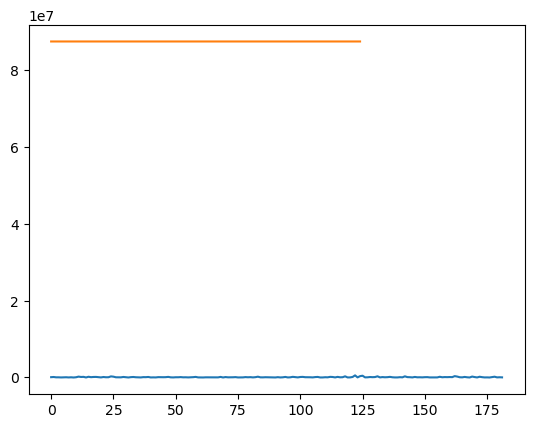

In [130]:
train_predictions = model.predict(X_train)
predictions = scaler.inverse_transform(train_predictions).flatten()
# train_target = scaler.inverse_transform(y_train).flatten()
# train_results = pd.DataFrame(data={'Train Predictions': predictions, 'Actuals':train_target})
# train_results
index_start = 0
df = pd.DataFrame(predictions, index=index, columns=['Values'])
index = range(index_start, index_start + len(predictions))
plt.plot(dailyExpenses, label='Original Data')
plt.plot(df)
plt.xlabel

In [94]:
test_predictions = model.predict(X_test)
test_results = scaler.inverse_transform(test_predictions).flatten()
test_target = scaler.inverse_transform(y_test).flatten()
# validation_results = pd.DataFrame(data={'Test Predictions': test_results, 'Actuals':test_target})
# validation_results
index_start = 125
dfTest = pd.DataFrame(test_results, index=index, columns=['Values'])
index = range(index_start, index_start + len(test_results))
plt.plot(dailyExpenses, label='Original Data')
plt.plot(dfTest)
plt.xlabel

2/2 [==============================] - 0s 17ms/step


ValueError: Shape of passed values is (43, 1), indices imply (125, 1)

In [ ]:
test_predictions = model.predict([[[0.        ]],

        [[0.05632673]],

        [[0.03461951]],

        [[0.08752563]]])